# WeatherPy
_____________________________________________________________________________

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import urllib
import datetime
import time



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [3]:
# Create a time stamp and getting the current date
#timestamp = pd.Timestamp(datetime.datetime(2023, 4, 22))
#res = timestamp.today()



# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url =  f"{url}appid={weather_api_key}&units={units}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #urllib_url = urllib.request.pathname2url(city)
    #city_url = query_url + "&q=" + urllib_url
    
    city_url = query_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | mugia
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | fort st. john
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | lakatoro
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | fuerte olimpo
Processing Record 15 of Set 1 | baie-comeau
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | pearsall
Processing Record 18 of Set 1 | ambon
Processing Record 19 of Set 1 | chokwe
Processing Record 20 of Set 1 | demba
Processing Record 21 of Set 1 | nikolayevsk-on-amure
Processing Record 22 of Set 1 | syumsi
Processing Record 23 of Set 

Processing Record 35 of Set 4 | santana
Processing Record 36 of Set 4 | korkuteli
Processing Record 37 of Set 4 | vilyuchinsk
Processing Record 38 of Set 4 | bredasdorp
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | praia
Processing Record 41 of Set 4 | shimoda
Processing Record 42 of Set 4 | les cayes
Processing Record 43 of Set 4 | invercargill
Processing Record 44 of Set 4 | banda aceh
Processing Record 45 of Set 4 | xilin hot
Processing Record 46 of Set 4 | tver
Processing Record 47 of Set 4 | mundra
Processing Record 48 of Set 4 | luquillo
Processing Record 49 of Set 4 | howard springs
Processing Record 0 of Set 5 | smolensk
Processing Record 1 of Set 5 | weno
Processing Record 2 of Set 5 | stanley
Processing Record 3 of Set 5 | antonio enes
Processing Record 4 of Set 5 | casablanca
Processing Record 5 of Set 5 | dabou
Processing Record 6 of Set 5 | watsa
Processing Record 7 of Set 5 | tralee
Processing Record 8 of Set 5 | shakawe
Processing Record 9 of 

Processing Record 28 of Set 8 | lagoa
Processing Record 29 of Set 8 | ingeniero jacobacci
Processing Record 30 of Set 8 | ramos arizpe
Processing Record 31 of Set 8 | arraial do cabo
Processing Record 32 of Set 8 | asasa
Processing Record 33 of Set 8 | la passe
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | acajutla
Processing Record 36 of Set 8 | villa bruzual
Processing Record 37 of Set 8 | betioky
Processing Record 38 of Set 8 | den chai
Processing Record 39 of Set 8 | mao
Processing Record 40 of Set 8 | lexington
Processing Record 41 of Set 8 | dawei
Processing Record 42 of Set 8 | bor
Processing Record 43 of Set 8 | east london
Processing Record 44 of Set 8 | markovo
Processing Record 45 of Set 8 | tazacorte
Processing Record 46 of Set 8 | veraval
Processing Record 47 of Set 8 | cuito
Processing Record 48 of Set 8 | saint-philippe
Processing Record 49 of Set 8 | daru
Processing Record 0 of Set 9 | usogorsk
Processing Record 1 of Set 9 | marte
Processing R

Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | augustow
Processing Record 23 of Set 12 | sao felix do xingu
Processing Record 24 of Set 12 | port augusta
Processing Record 25 of Set 12 | taroa
Processing Record 26 of Set 12 | igabi
Processing Record 27 of Set 12 | gryazi
Processing Record 28 of Set 12 | shalqar
Processing Record 29 of Set 12 | campo gallo
Processing Record 30 of Set 12 | merritt
Processing Record 31 of Set 12 | whitefish
Processing Record 32 of Set 12 | kotido
Processing Record 33 of Set 12 | praia da vitoria
Processing Record 34 of Set 12 | dobris
Processing Record 35 of Set 12 | tynda
Processing Record 36 of Set 12 | fort stockton
Processing Record 37 of Set 12 | darwin
Processing Record 38 of Set 12 | bull savanna
Processing Record 39 of Set 12 | portland
Processing Record 40 of Set 12 | mutuali
Processing Record 41 of Set 12 | kayangel
Processing Record 42 of Set 12 | labuan bajo
Processing Record 43 of Set 12 | argo
Processing Record 44 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.22,88,100,6.30,PN,1682365851
1,mugia,43.1041,-9.2179,16.62,92,100,5.08,ES,1682365851
2,west island,-12.1568,96.8225,26.99,74,75,9.26,CC,1682365851
3,fort st. john,56.2499,-120.8529,2.94,87,100,2.57,CA,1682365851
4,papatowai,-46.5619,169.4708,12.57,74,75,10.89,NZ,1682365851


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.22,88,100,6.30,PN,1682365851
1,mugia,43.1041,-9.2179,16.62,92,100,5.08,ES,1682365851
2,west island,-12.1568,96.8225,26.99,74,75,9.26,CC,1682365851
3,fort st. john,56.2499,-120.8529,2.94,87,100,2.57,CA,1682365851
4,papatowai,-46.5619,169.4708,12.57,74,75,10.89,NZ,1682365851


### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

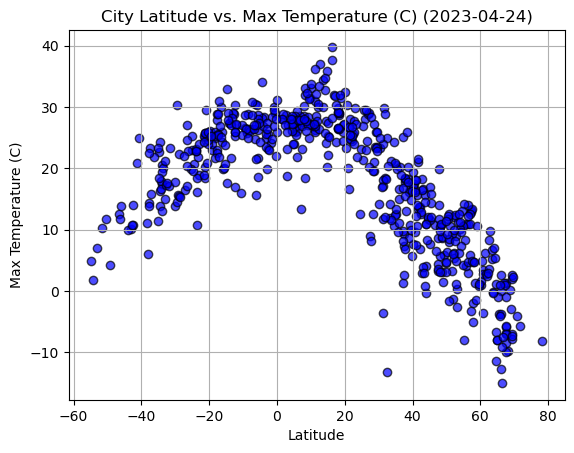

In [9]:
## Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (C) ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

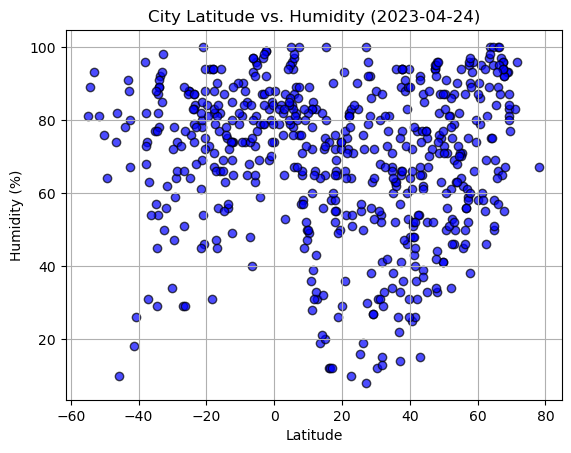

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

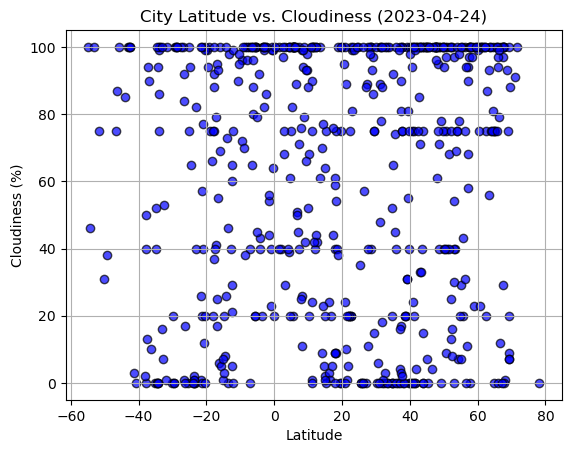

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

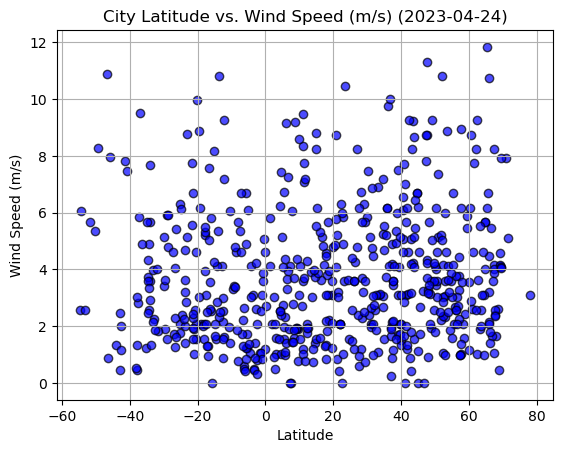

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (m/s) ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mugia,43.1041,-9.2179,16.62,92,100,5.08,ES,1682365851
3,fort st. john,56.2499,-120.8529,2.94,87,100,2.57,CA,1682365851
5,yellowknife,62.4560,-114.3525,8.29,46,20,1.03,CA,1682365852
8,la'ie,21.6477,-157.9253,27.98,72,5,0.43,US,1682365852
9,isafjordur,66.0755,-23.1240,0.00,66,94,4.48,IS,1682365853


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.22,88,100,6.30,PN,1682365851
2,west island,-12.1568,96.8225,26.99,74,75,9.26,CC,1682365851
4,papatowai,-46.5619,169.4708,12.57,74,75,10.89,NZ,1682365851
6,port-aux-francais,-49.3500,70.2167,4.28,64,38,8.28,TF,1682365604
7,alofi,-19.0595,-169.9187,22.94,94,75,2.06,NU,1682365852


### Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8758553354100235


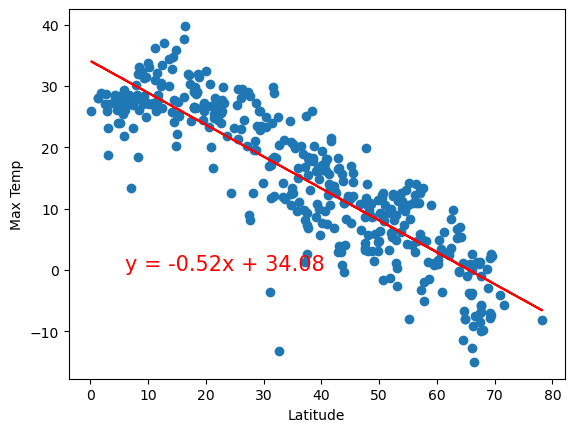

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7502012981363113


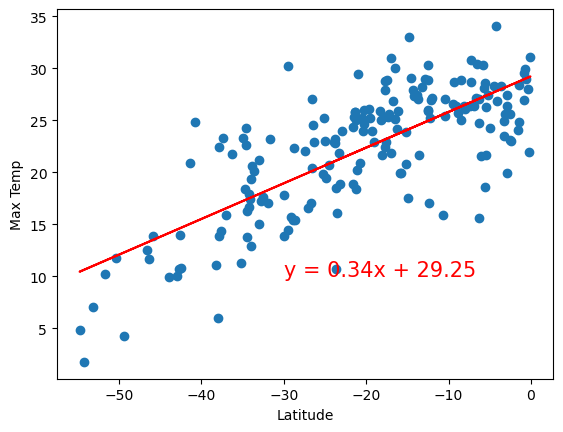

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship:
###### From the plots above for the Northern and Southernt Hemispheres we can see that there is a very strong correlation between the Latitude and Max Temperature. Thouhg the Northern Hemisperes has a negative correlation (r-value is: -0.8758553354100235), meaning that as the Latitude increases the Max Temperature decreases. Unlike the Southern Hemisphere, which has a strong positive correlation(r-value is: 0.7502012981363113), meaning that with the increase of the Latitude, the Max Temperature increases too. This shows that the hottest area is near the equater. 

## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13318361820648497


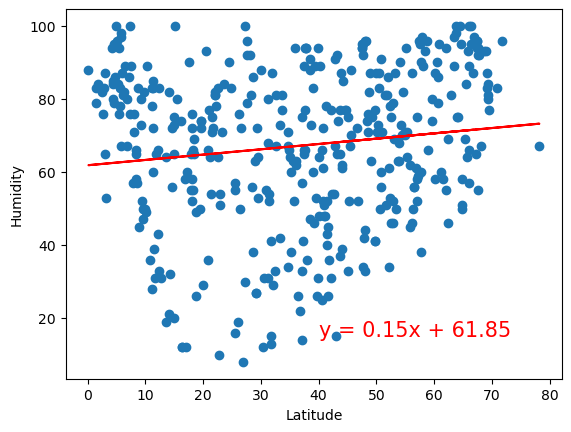

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.20456678037271064


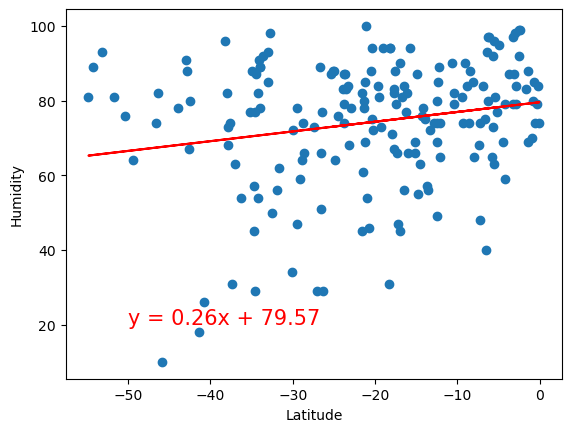

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship: 
##### The Linear Regression line shows that there is almost no correlation between the Latitude and Humidity. Fot the Northern Hemisphere the correlation is lower(r-value is: 0.13318361820648497) than for the Southern Hemisphere(r-value is: 0.20456678037271064). So we can say that the Latitude does not affect the level of Humidity.

## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07313787874215466


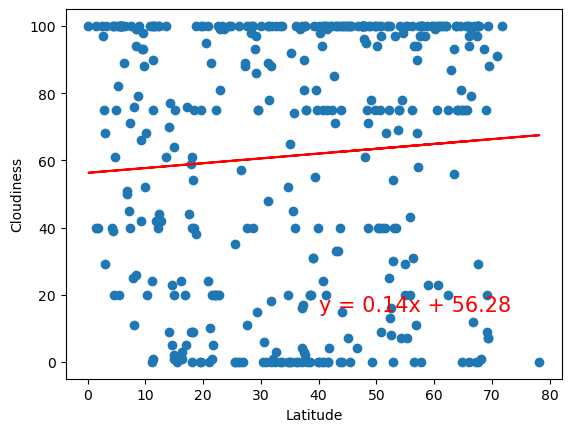

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.12494366961396407


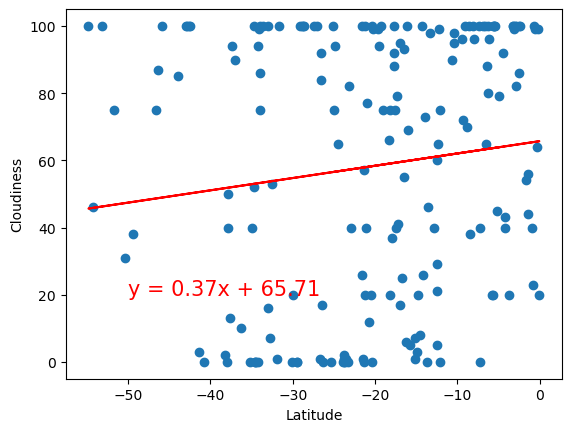

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship: 
##### Same thing is true for the correlation between Latitude and Cloudiness. The r value for both hemispheres is very low, even thought the Southern Hemisphere has a little higher r value. There is no correlation between the Latitude and Cloudiness.

## Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1067936156776333


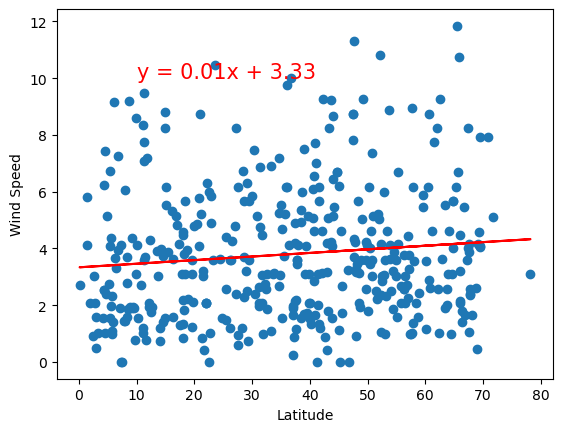

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.206039712047309


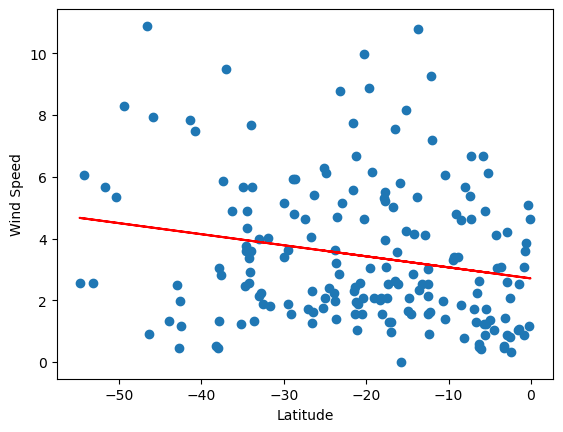

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

## Discussion about the linear relationship: 
#### There is a very week assosiation between the Latitude and Wind Speed. Northern Hemisphere has a positive correlation with r-value 0.1067936156776333 with is very low. And the Southern Hemisphere has a negative corralation with r-value -0.206039712047309, which is a little higher than the Northern, which shows a very week assosiation between the Latitude and Wind Speed. 